In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filename = "CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv"
df = pd.read_csv(filename)

In [31]:
# downsample data
# n = 10
# num_lines = sum(1 for l in open(filename))
# to_skip = [x for x in range(1,num_lines) if x%n !=0]
# ds = pd.read_csv(filename, skiprows=to_skip)

In [4]:
df['datetime'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [17]:
seasons = [1,1,2,2,2,3,3,3,4,4,4,1]
months = range(1,13)
mtos = dict(zip(months,seasons))
df['season'] = df['datetime'].dt.month.map(mtos)
season_dict = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}

In [7]:
days = df.daytype.unique().tolist()
stations = df.stationname.unique().tolist()
len(stations)

148

In [23]:
daydict = dict(zip(days,['Sun/Hol', 'Weekday', 'Sat']))

In [24]:
mparklist = ['Washington/Wabash', 'Clark/Lake']

In [38]:
def make_layered_hist(array, station, variablename, variablelist, vardict):
    fig, ax = plt.subplots()
    for var in variablelist:
        condarray = array[(array['stationname']==station) & (array[variablename]==var)]
        dist=sns.distplot(condarray['rides'], ax=ax, label=vardict[var])
        ax.legend()
        ax.set_xlabel('# of Rides Daily', fontsize=16)
    dist=dist.get_figure()
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_xlim([0,25000])
    plt.title('Distribution of ' + station +' Rides', fontsize=20)
    return fig, ax
#     kde.savefig('figs/react_kde' + condDay + '.png')
#     plt.clf()

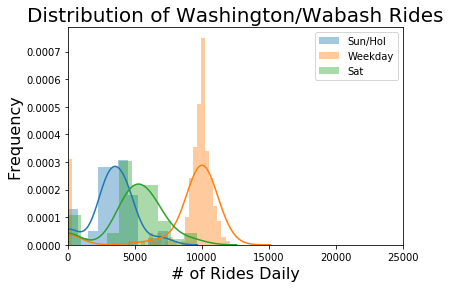

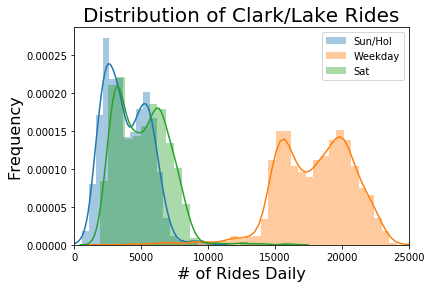

In [39]:
for park in mparklist:
    fig, ax = make_layered_hist(df, park, 'daytype', days, daydict)

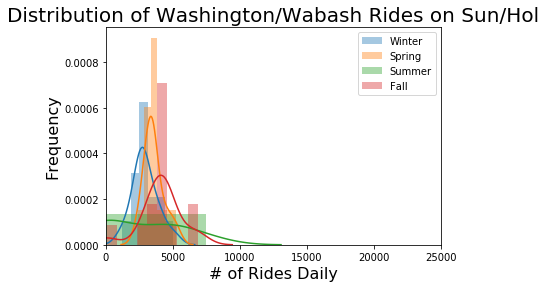

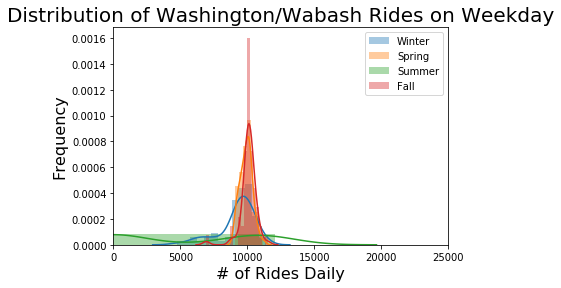

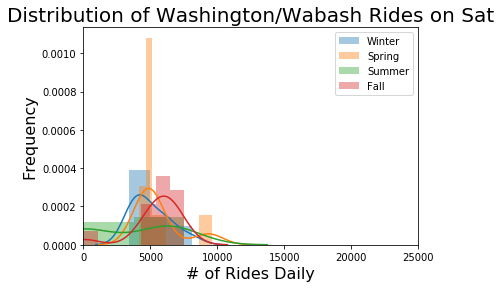

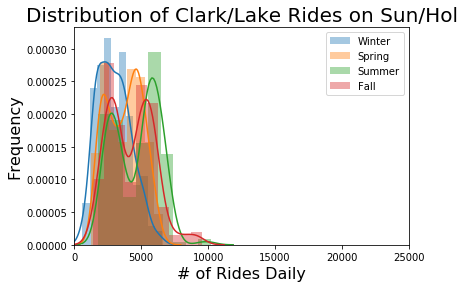

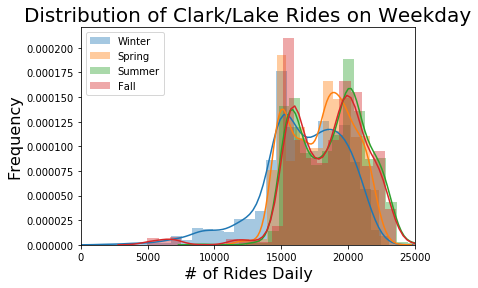

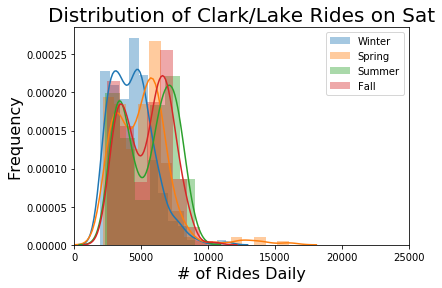

In [45]:
for park in mparklist:
    for day in days:
        fig, ax = make_layered_hist(df[df['daytype']==day], park, 'season', list(range(1,5)), season_dict)
        plt.title('Distribution of ' + park +' Rides on ' + daydict[day], fontsize=20)

In [10]:
y=pd.DataFrame(df_all.groupby(by=['stationname', 'daytype'])['rides'].mean())
y.loc[y.idxmax()]

NameError: name 'df_all' is not defined

In [11]:
stds = pd.DataFrame(index=stations, columns=['std'])
for station in stations:
    stds.loc[station,'std'] = (df.rides[df['stationname']==station].std())
